In [1]:
#pip install statsmodels

In [2]:
#pip install yfinance

In [3]:
#pip install Numpy==1.23.5

In [4]:
import pandas as pd 
import datetime
import yfinance as yfin

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

#relax the display limits on columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\dmcqu\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [9]:
btc = yfin.download(['BTC-USD'], start="2018-01-01",end="2020-12-2")

btc.head(5)

Failed to get ticker 'BTC-USD' reason: HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000002AFD1780250>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2018-01-01,13657.200195,14112.200195,13154.700195,14112.200195,10291200000
2018-01-02,14982.099609,15444.599609,13163.599609,13625.000000,16846600192
2018-01-03,15201.000000,15572.799805,14844.500000,14978.200195,16871900160
2018-01-04,15599.200195,15739.700195,14522.200195,15270.700195,21783199744
2018-01-05,17429.500000,17705.199219,15202.799805,15477.200195,23840899072


In [17]:
btc = btc['Close']
btc.to_csv("btc.csv")
btc = pd.read_csv("btc.csv")
btc.head(5)

KeyError: 'Close'

In [18]:
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')
del btc['Date']

btc.head(5)

KeyError: 'Date'

KeyError: 'Close'

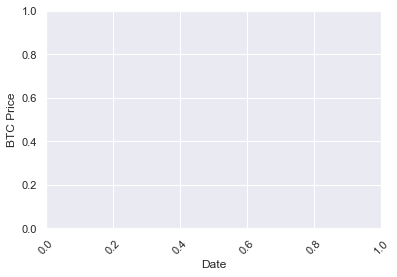

In [19]:
sns.set()
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['Close'], )
plt.show()

In [20]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test = btc[btc.index >= pd.to_datetime("2020-11-01", format='%Y-%m-%d')]
test

,BTC-USD
Date,
2020-11-01,13737.109375
2020-11-02,13550.489258
2020-11-03,13950.300781
2020-11-04,14133.707031
2020-11-05,15579.848633
2020-11-06,15565.880859
2020-11-07,14833.753906
2020-11-08,15479.567383
2020-11-09,15332.315430


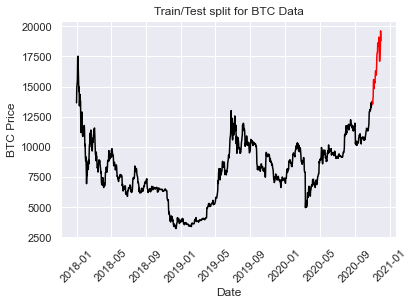

In [21]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

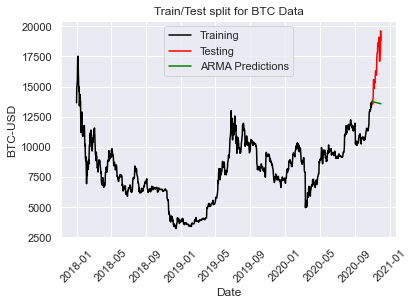

In [22]:
y = train['BTC-USD']

ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC-USD')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("ARMA RMSE: ",arma_rmse)

ARMA RMSE:  3509.5596304572978


In [24]:
#ARIMAmodel = SARIMAX(y, order = (2, 2, 2))
#ARIMAmodel = SARIMAX(y, order = (2, 3, 2))
ARIMAmodel = SARIMAX(y, order = (5, 4, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0],
                                              end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARIMA = y_pred_df["Predictions"]

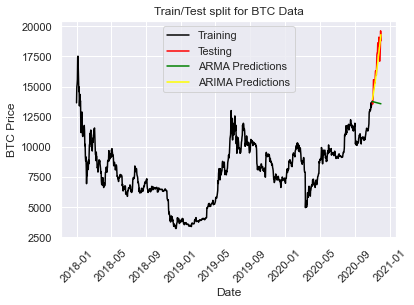

In [25]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()
plt.show()

In [27]:
arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("ARIMA RMSE: ",arma_rmse)

ARIMA RMSE:  818.9724394760751


In [28]:
SARIMAXmodel = SARIMAX(y, order = (2,2,2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0],
                                                end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outSARIMAX = y_pred_df["Predictions"] 

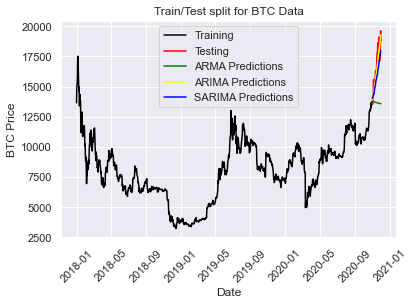

In [29]:
plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_outARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_outSARIMAX, color='Blue', label = 'SARIMA Predictions')
plt.legend()
plt.show()

In [31]:
arma_rmse = np.sqrt(mean_squared_error(test["BTC-USD"].values, y_pred_df["Predictions"]))
print("SARIMA RMSE: ",arma_rmse)

SARIMA RMSE:  1218.5010782735974
